In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
from os.path import basename, join, exists

In [ ]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/"
total=0
print('---Training set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images ",total)

---Training set details----
1676 with_DR images
1608 without_DR images
Total no. of images  3284


In [ ]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/"
total=0
print('---Test set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images",total)

---Test set details----
181 with_DR images
197 without_DR images
Total no. of images 378


In [ ]:
import numpy as np
np.random.seed(777)
import time
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.applications.inception_v3 import preprocess_input as pi_incep
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet
from keras.applications.vgg19 import preprocess_input as pi_vgg19
from keras.applications.xception import preprocess_input as pi_xcep 
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from  numpy import mean 
from numpy import std
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Concatenate
from keras.layers import BatchNormalization,Dropout
from keras.layers import Lambda
from keras.regularizers import l2
import math
from keras import backend as K
from keras.metrics import categorical_accuracy
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [ ]:
img_height =299
img_width = 299
batch_size =32
input_shape = (img_width, img_height, 3)

In [ ]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2,
    zoom_range=0.2)
    #shear_range=0.2)

train_generator_Excep = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='binary')

val_generator_Excep = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator_Excep=test_datagen.flow_from_directory("/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/",
                                                      target_size=(img_height, img_width),
                                                          batch_size=batch_size, 
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='binary') # set as training data

Found 2628 images belonging to 2 classes.
Found 656 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [ ]:
nb_train_samples = len(train_generator_Excep.filenames)
nb_validation_samples = len(val_generator_Excep.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator_Excep.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
print(nb_train_samples)
print(nb_validation_samples)
print(nb_test_samples)
print(predict_size_train)
print(predict_size_validation)
print(predict_size_test)

2628
656
378
83
21
12


In [ ]:
model_name="Xception"
model = Xception(include_top=False, weights="imagenet",pooling='avg',input_tensor=Input(shape=input_shape))
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_4
13 block2_pool
14 batch_normalization_4
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_5
23 block3_pool
24 batch_normalization_5
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_6
33 block4_pool
34 batch_normalization_6
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [ ]:
image_input =model.input
x1 = GlobalAveragePooling2D()(model.get_layer("block4_sepconv1_act").output) #layer_26
x2 = GlobalAveragePooling2D()(model.get_layer("block5_sepconv1_act").output) #layer_36
x3 = GlobalAveragePooling2D()(model.get_layer("block14_sepconv1").output)  #layer_126
out= Concatenate()([x1,x2,x3])
custom_xcep_model = Model(image_input , out)
custom_xcep_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
for i, layer in enumerate(custom_xcep_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_4
13 block2_pool
14 batch_normalization_4
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_5
23 block3_pool
24 batch_normalization_5
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_6
33 block4_pool
34 batch_normalization_6
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [ ]:
bottleneck_features_train = custom_xcep_model.predict_generator(train_generator_Excep, predict_size_train)
np.save("/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/"+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [ ]:
bottleneck_features_validation = custom_xcep_model.predict_generator(val_generator_Excep, predict_size_validation)
np.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/'+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [ ]:
bottleneck_features_test = custom_xcep_model.predict_generator(test_generator_Excep, predict_size_test)
np.save("/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/"+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [ ]:
train_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_train_Xception.npy')
validation_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_validation_Xception.npy')
test_data = np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_test_Xception.npy')

In [ ]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(2628, 2520)
(656, 2520)
(378, 2520)


In [ ]:
train_labels=train_generator_Excep.classes
train_labels=train_labels = to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_Excep.classes
validation_labels = to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_Excep.classes
test_labels=to_categorical(test_labels,num_classes=2)

In [ ]:
model = Sequential()
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
adam_opt2=Adam(lr = 0.001, beta_1=0.6, beta_2=0.8, amsgrad=True)

model.compile(optimizer=adam_opt2, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 1)

In [ ]:
preds = model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Validation Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

In [ ]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
#cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

In [ ]:
model.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/Xception_upto15frozen.h5')
model.save_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/Xception_upto15frozen_weights.h5')

In [ ]:
loaded_model=load_model('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/Xception_upto15frozen.h5',compile=False)
loaded_model.load_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/Xception_upto15frozen_weights.h5')

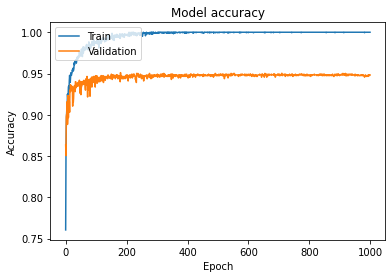

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

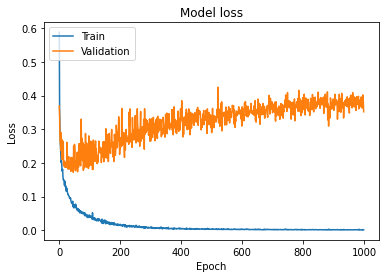

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
validation_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_validation_Xception.npy')
test_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_test_Xception.npy')

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9817073170731707


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import pandas as pd

In [ ]:
preds = loaded_model.predict(test_data)

y_pred = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))

Test Accuracy=0.9867724867724867


In [ ]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['with_DR','without_DR'],  
                           index =['with_DR','without_DR']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 
target_names=['with_DR','without_DR']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred,target_names=target_names))

CONFUSION MATRIX


NameError: ignored

In [ ]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

NameError: ignored